In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score, accuracy_score, precision_score, roc_curve
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

# 1 task

In [2]:
df = pd.read_excel("/content/Task_1_2.xlsx", sheet_name="Timeseries", header=0, names=['Date', 'Value'])

In [3]:
df.head()

,Date,Value
0,2015-01-01,1006.699649
1,2015-01-02,3197.751826
2,2015-01-03,3217.491035
3,2015-01-04,2151.573759
4,2015-01-05,4243.929892


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
print(df['Date'].max())
print(df['Date'].min())

2019-06-30 00:00:00
2015-01-01 00:00:00


In [6]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [7]:
df.head()

,Date,Value,Year,Month,Day
0,2015-01-01,1006.699649,2015,1,1
1,2015-01-02,3197.751826,2015,1,2
2,2015-01-03,3217.491035,2015,1,3
3,2015-01-04,2151.573759,2015,1,4
4,2015-01-05,4243.929892,2015,1,5


In [8]:
list_of_2019 = []
list_by_monthes = []

for year in range(2015, 2019):
  for month in range(1,13):
    list_by_monthes.append(df[(df['Year'] == year) & (df['Month'] == month)]['Value'].sum())

for month in range(1,7):
  list_of_2019.append(df[(df['Year'] == 2019) & (df['Month'] == month)]['Value'].sum())

list_by_monthes = list_by_monthes + list_of_2019

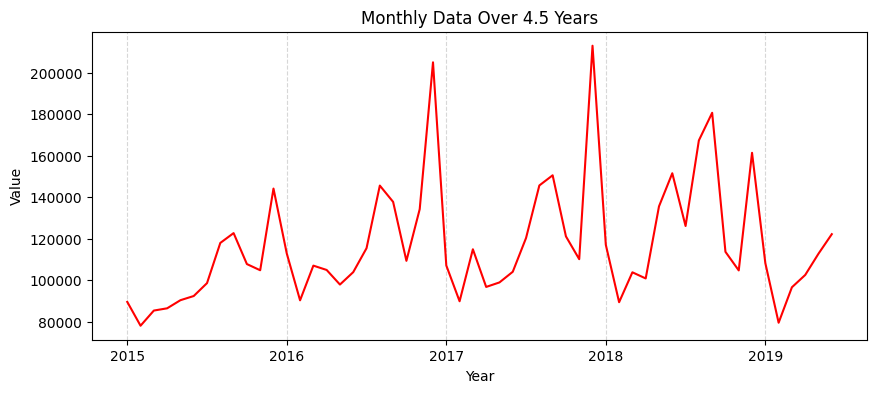

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(np.arange(1, 55), list_by_monthes, color='red')

years = [1, 13, 25, 37, 49]
year_labels = ["2015", "2016", "2017", "2018", "2019"]
plt.xticks(years, year_labels)

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Monthly Data Over 4.5 Years")
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

In [13]:
by_months_2015 = []
by_months_2016 = []
by_months_2017 = []
by_months_2018 = []
by_months_2019 = []
v = f"by_months_{year}"

for month in range(1,13):
  by_months_2015.append(df[(df['Year'] == 2015) & (df['Month'] == month)]['Value'].sum())
  by_months_2016.append(df[(df['Year'] == 2016) & (df['Month'] == month)]['Value'].sum())
  by_months_2017.append(df[(df['Year'] == 2017) & (df['Month'] == month)]['Value'].sum())
  by_months_2018.append(df[(df['Year'] == 2018) & (df['Month'] == month)]['Value'].sum())
  by_months_2019.append(df[(df['Year'] == 2019) & (df['Month'] == month)]['Value'].sum())

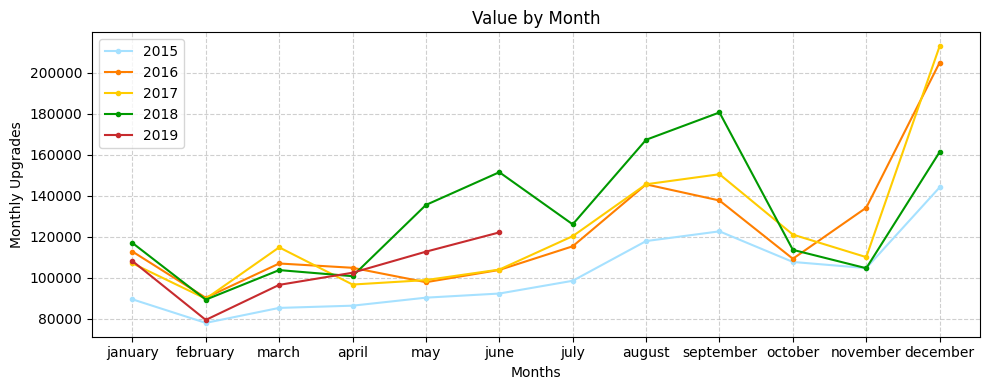

In [19]:
months = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']
plt.figure(figsize=(10, 4))
plt.plot(months, by_months_2015, label='2015', color='#a6e1ff', marker='o', markersize=3)
plt.plot(months, by_months_2016, label='2016', color='#ff7f00', marker='o', markersize=3)
plt.plot(months, by_months_2017, label='2017', color='#FFCC00', marker='o', markersize=3)
plt.plot(months, by_months_2018, label='2018', color='#009900', marker='o', markersize=3)
plt.plot(months[:6], by_months_2019[:6], label='2019', color='#C72B2E', marker='o', markersize=3)


plt.xlabel('Months')
plt.ylabel('Monthly Upgrades')
plt.title('Value by Month')
plt.legend()
plt.xticks(label=['Jan', 'Feb', 'Mar'])

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

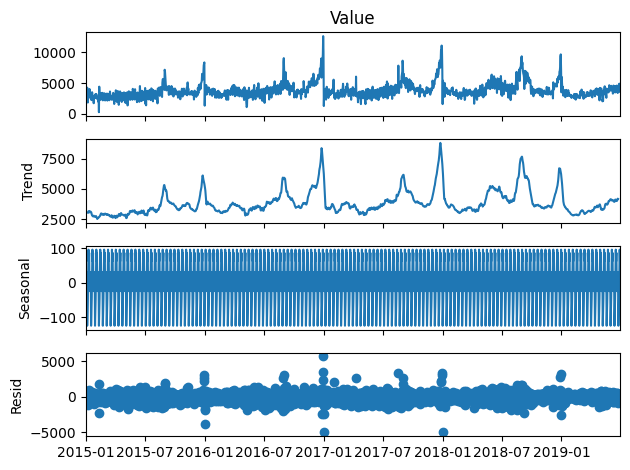

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

df.set_index("Date", inplace=True)
df = df.sort_index()

ts = df["Value"]

decomposition = seasonal_decompose(ts, model="additive", period=12)
decomposition.plot()
plt.show()

In [ ]:
model = SARIMAX(ts, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
forecast = results.get_forecast(steps=2)  # Adjust steps for missing months
forecast_index = pd.date_range(start="2019-06-30", periods=2, freq="M")
forecast_values = forecast.predicted_mean

<ipython-input-24-f27e4c8951ed>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start="2019-06-30", periods=2, freq="M")


In [ ]:
forecast_values

,predicted_mean
2019-07-01,3901.344989
2019-07-02,3788.074663


DEBUG:cmdstanpy:input tempfile: /tmp/tmpfdbemqrz/663_0ukl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfdbemqrz/391lrg5u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69543', 'data', 'file=/tmp/tmpfdbemqrz/663_0ukl.json', 'init=/tmp/tmpfdbemqrz/391lrg5u.json', 'output', 'file=/tmp/tmpfdbemqrz/prophet_modeluo5sc2dg/prophet_model-20241127094937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:49:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:49:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


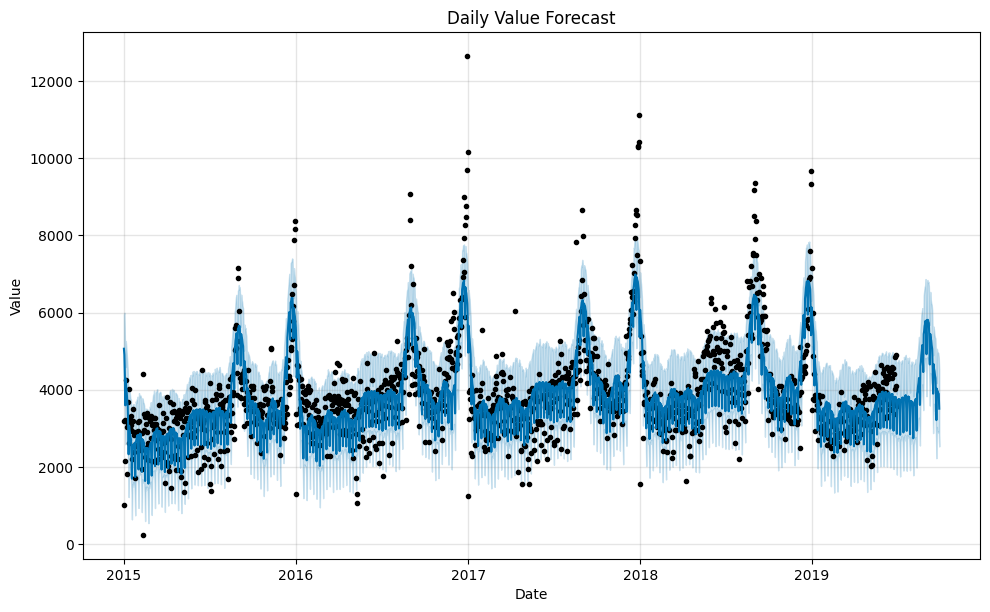

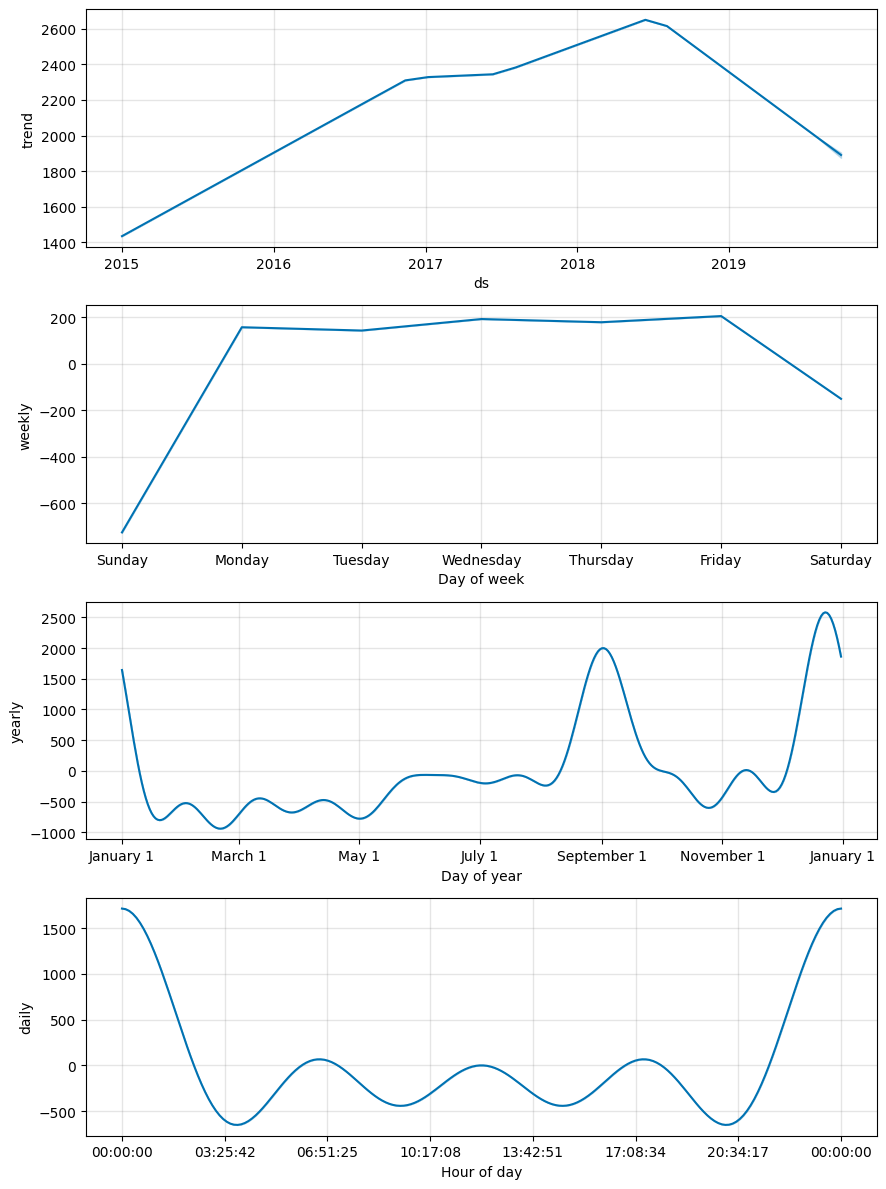

In [22]:
from prophet import Prophet

prophet_df = df.reset_index()[["Date", "Value"]].rename(columns={"Date": "ds", "Value": "y"})

model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(prophet_df)

future = model.make_future_dataframe(periods=90, freq="D")  # Predict for 90 days
forecast = model.predict(future)

fig = model.plot(forecast)
plt.title("Daily Value Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

fig_components = model.plot_components(forecast)
plt.show()


In [23]:
# Save predictions to a CSV file
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].to_csv("forecast.csv", index=False)

# Inspect predictions
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10))


             ds         yhat   yhat_lower   yhat_upper
1722 2019-09-19  4366.536122  3349.642045  5353.038054
1723 2019-09-20  4300.275878  3229.111829  5325.021233
1724 2019-09-21  3860.073525  2853.891435  4826.705217
1725 2019-09-22  3209.883984  2220.676316  4167.399635
1726 2019-09-23  4024.359152  3032.724836  5060.155357
1727 2019-09-24  3951.841688  2882.146838  4959.691541
1728 2019-09-25  3951.637379  2886.845216  4962.883796
1729 2019-09-26  3896.556098  2924.847750  4948.400317
1730 2019-09-27  3889.214936  2867.368979  4837.899910
1731 2019-09-28  3506.647128  2527.446819  4529.682030


# 2 task

## Funstions

In [48]:
def all_visuals(model, X_train, X_test, y_test, y_pred, probs):

  fpr, tpr, thresholds = roc_curve(y_test, probs)
  auc_score = roc_auc_score(y_test, probs)

  fig, axes = plt.subplots(1, 5, figsize=(30, 5))

  sns.heatmap(confusion_matrix(y_test, y_pred) / 2000, annot=True, fmt=".2%", cmap="Blues", ax=axes[0])
  axes[0].set_title("Relative Confusion Matrix")
  axes[0].set_xlabel("Predicted")
  axes[0].set_ylabel("Actual")

  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", ax=axes[1])
  axes[1].set_title("Absolute Confusion Matrix")
  axes[1].set_xlabel("Predicted")
  axes[1].set_ylabel("Actual")

  axes[2].plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
  axes[2].plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
  axes[2].set_title("Receiver Operating Characteristic (ROC) Curve")
  axes[2].set_xlabel("False Positive Rate (FPR)")
  axes[2].set_ylabel("True Positive Rate (TPR)")
  axes[2].legend(loc="lower right")
  axes[2].grid()

  coefficients = model.coef_[0]
  feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
    })
  feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
  feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

  top_3_features = feature_importance.head(3)

  axes[3].barh(top_3_features['Feature'], top_3_features['Abs_Coefficient'], color='steelblue')
  axes[3].set_xlabel('Absolute Coefficient Value')
  axes[3].set_title('Top 3 most importantfFeatures')
  axes[3].invert_yaxis()


  axes[4].axis('off')  # Hide the axis
  axes[4].text(0.5, 0.7, f"Accuracy: {accuracy_score(y_test, y_pred):.2f}", ha='center', fontsize=14)
  axes[4].text(0.5, 0.5, f"Precision: {precision_score(y_test, y_pred):.2f}", ha='center', fontsize=14)
  axes[4].text(0.5, 0.3, f"Recall: {recall_score(y_test, y_pred):.2f}", ha='center', fontsize=14)
  axes[4].text(0.5, 0.1, f"F1-score: {f1_score(y_test, y_pred):.2f}", ha='center', fontsize=14)
  axes[4].set_title("Model Metrics")

  plt.tight_layout()

  plt.show()

In [35]:
def weighted_imputation(column):
    observed = column.dropna()
    unique_observed = observed.unique()
    weights = observed.value_counts(normalize=True).reindex(unique_observed, fill_value=0)
    return column.apply(lambda x: np.random.choice(unique_observed, p=weights) if pd.isnull(x) else x)

## General

In [27]:
training_df = pd.read_excel("/content/Task_1_2.xlsx", sheet_name="Training", header=0)
validate_df = pd.read_excel("/content/Task_1_2.xlsx", sheet_name="Validate", header=0)

Let's explore the data on the surface level

In [28]:
print(training_df.shape)
print(validate_df.shape)

(10000, 33)
(20000, 33)


In [29]:
training_df.head()

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
0,283,1,0.0,NaN,NaN,10,0,1.02273,1.01608,1.55268,...,831.68333,783.81667,171.33333,818.15000,0.62772,0.13333,0.00000,6.41893,0.97122,6.41893
1,342,0,0.0,30.00000,6.80153,0,0,1.00000,1.65348,1.14852,...,195.13889,168.30000,81.00000,NaN,6.32407,0.26667,0.33333,NaN,1.60714,3.44800
2,631,0,0.0,30.00000,9.60267,0,0,1.00000,0.84143,NaN,...,226.10556,207.41667,110.00000,184.49444,2.25635,0.00000,0.06667,NaN,0.75000,8.08000
3,1165,0,0.0,30.33333,15.32553,0,0,0.98901,0.88114,NaN,...,567.53889,441.52778,194.00000,625.32222,2.74469,0.13333,0.40000,13.50400,0.98119,13.50400
4,1469,0,0.0,28.00000,7.54133,0,0,0.92857,1.21447,0.60138,...,154.80556,86.64444,71.66667,53.45000,0.91130,0.46667,0.40000,NaN,0.40171,3.44800


In [30]:
validate_df.head()

,ID,Target,P1,P2,P3,P4,P5,P6,P7,P8,...,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31
0,127,NaN,0.0,30.33333,8.86883,0,0,0.98901,1.01885,1.31226,...,85.59444,32.45000,41.00000,95.39444,4.64779,0.40000,0.73333,8.256,0.11725,8.256
1,214,NaN,0.0,30.33333,12.82570,0,0,0.98901,0.96587,0.94475,...,809.37778,787.77778,164.66667,239.95000,2.34907,0.00000,0.00000,4.320,1.33333,10.000
2,542,NaN,0.0,9.00000,5.25643,0,0,0.88889,0.97863,1.68000,...,26.34444,25.89444,1.33333,1.26667,0.43333,0.13333,0.06667,5.096,1.16688,5.096
3,674,NaN,0.0,24.33333,NaN,0,0,0.90411,0.88409,0.58490,...,116.31111,73.20000,27.33333,34.62222,0.69722,0.33333,0.13333,4.712,1.80000,4.712
4,756,NaN,0.0,30.33333,21.90167,0,0,0.98901,1.02636,1.30082,...,275.16111,201.13889,285.00000,369.42778,1.36109,0.13333,0.13333,21.096,0.00000,21.096


We've could observe some NaNs in the data-sets. It needs to be further checked.

In [31]:
training_df.isna().sum()

,0
ID,0
Target,0
P1,0
P2,1508
P3,1477
P4,0
P5,0
P6,0
P7,0
P8,1518


In [32]:
validate_df.isna().sum()

,0
ID,0
Target,20000
P1,0
P2,2968
P3,2979
P4,0
P5,0
P6,0
P7,0
P8,3015


As we've seen, the same features lack some data. Since models usually don't take NaNs, it should be imputed.

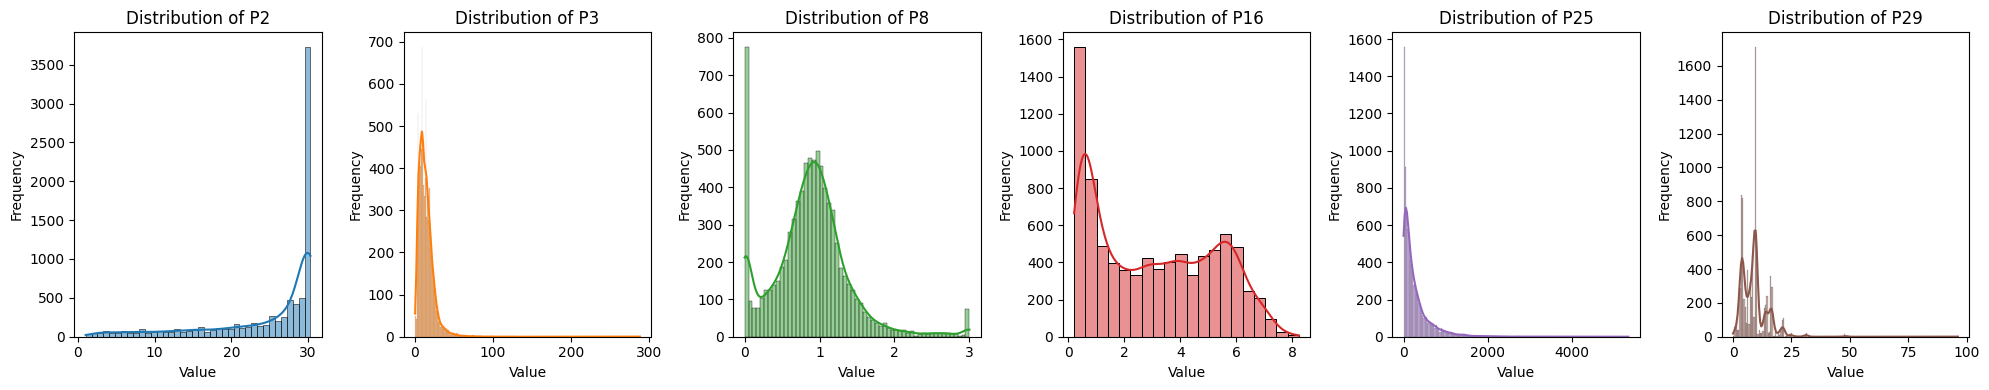

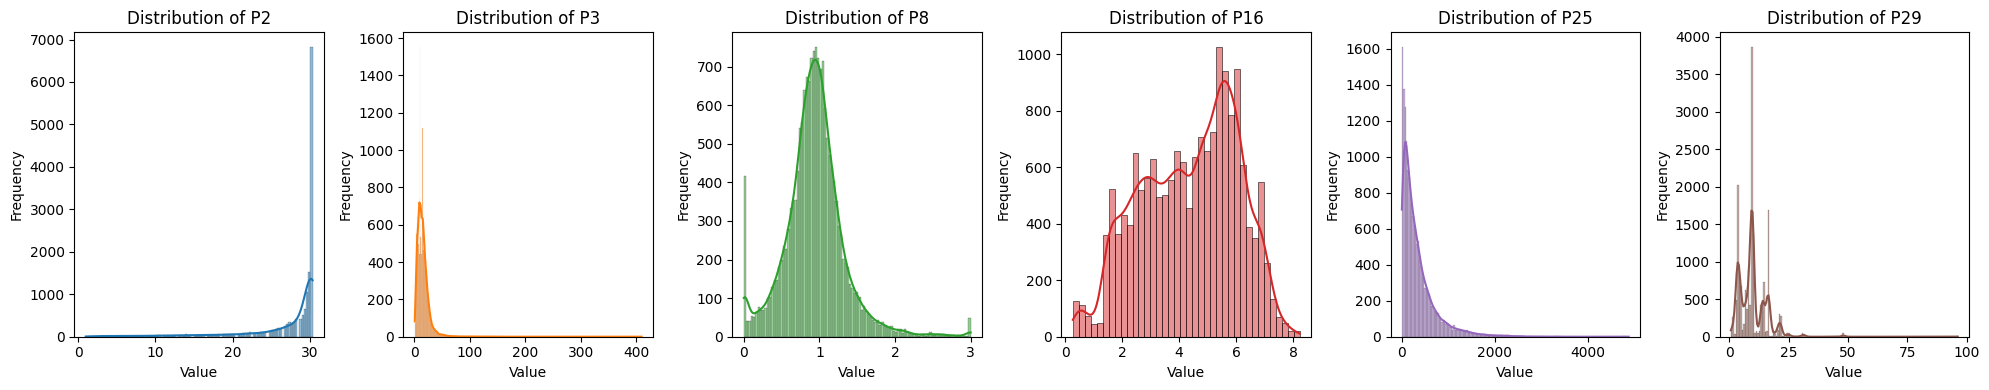

In [33]:
for k in [training_df, validate_df]:
  fig, axes = plt.subplots(1, 6, figsize=(20, 4))

  for i, column in enumerate(k[['P2', 'P3', 'P8', 'P16', 'P25', 'P29']]):
    sns.histplot(k[column].dropna(), kde=True, ax=axes[i], color=f"C{i}")
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

  plt.tight_layout()
  plt.show()

The imputation should not affect the distribution of values, therefore, it should be proportional. And also, the imputed values should be put in a random order to ensure the validity of a model:

In [36]:
for k in [training_df, validate_df]:

  for i in ['P2', 'P3', 'P8', 'P16', 'P25', 'P29']:

    k[i] = weighted_imputation(k[i])

In [37]:
training_df.isna().sum()

,0
ID,0
Target,0
P1,0
P2,0
P3,0
P4,0
P5,0
P6,0
P7,0
P8,0


In [38]:
validate_df.isna().sum()

,0
ID,0
Target,20000
P1,0
P2,0
P3,0
P4,0
P5,0
P6,0
P7,0
P8,0


Comparison of the changes in distributions:

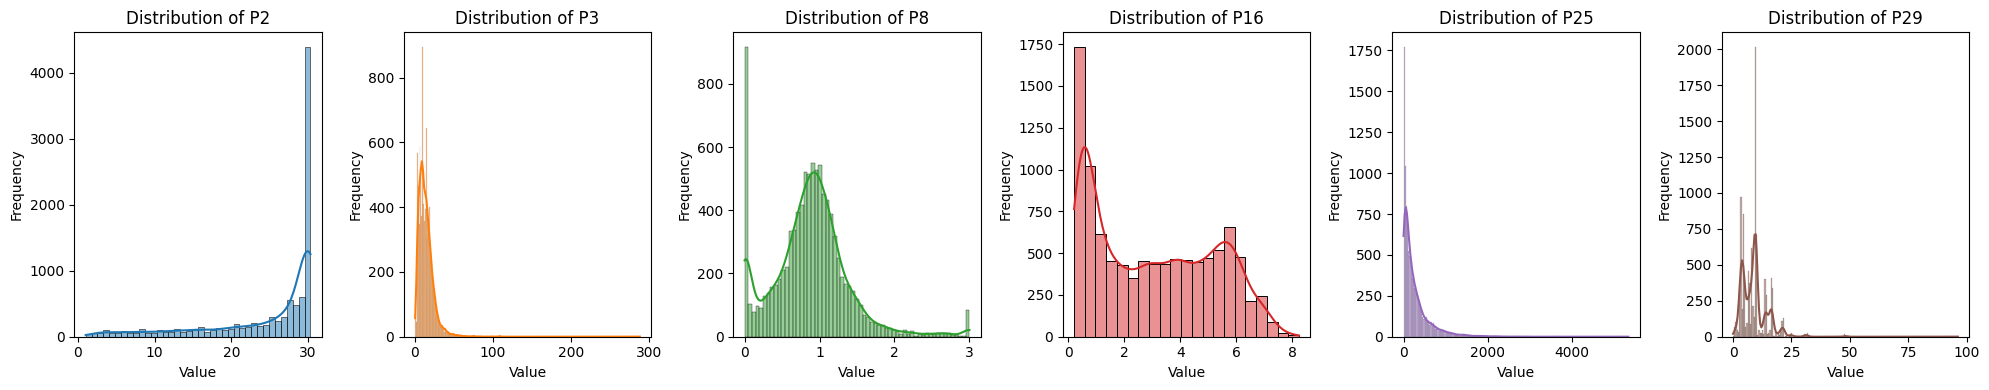

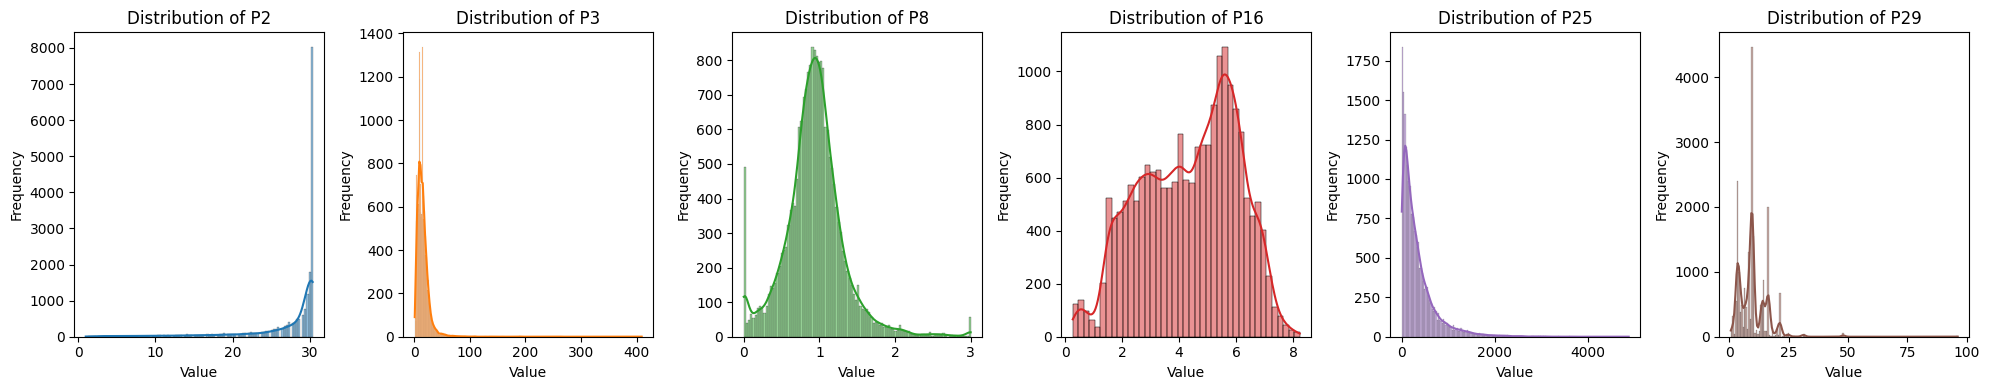

In [39]:
for k in [training_df, validate_df]:
  fig, axes = plt.subplots(1, 6, figsize=(20, 4))

  for i, column in enumerate(k[['P2', 'P3', 'P8', 'P16', 'P25', 'P29']]):
    sns.histplot(k[column].dropna(), kde=True, ax=axes[i], color=f"C{i}")
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

  plt.tight_layout()
  plt.show()

In [40]:
X = training_df.drop(columns=['ID', 'Target'])
y = training_df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(8000, 31)
(8000,)
(2000, 31)
(2000,)


The given training data set is ideally balanced.

In [42]:
training_df['Target'].value_counts()

,count
Target,
1,5000
0,5000


In [43]:
X_train, X_test, y_train, y_test = train_test_split(training_df.drop(columns=['ID', 'Target']), training_df['Target'], test_size=0.2, random_state=42)

## Modeling

In [44]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_


In [45]:
best_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', solver='liblinear')

In [46]:
y_pred = best_model.predict(X_test)
probs = best_model.predict_proba(X_test)[:, 1]

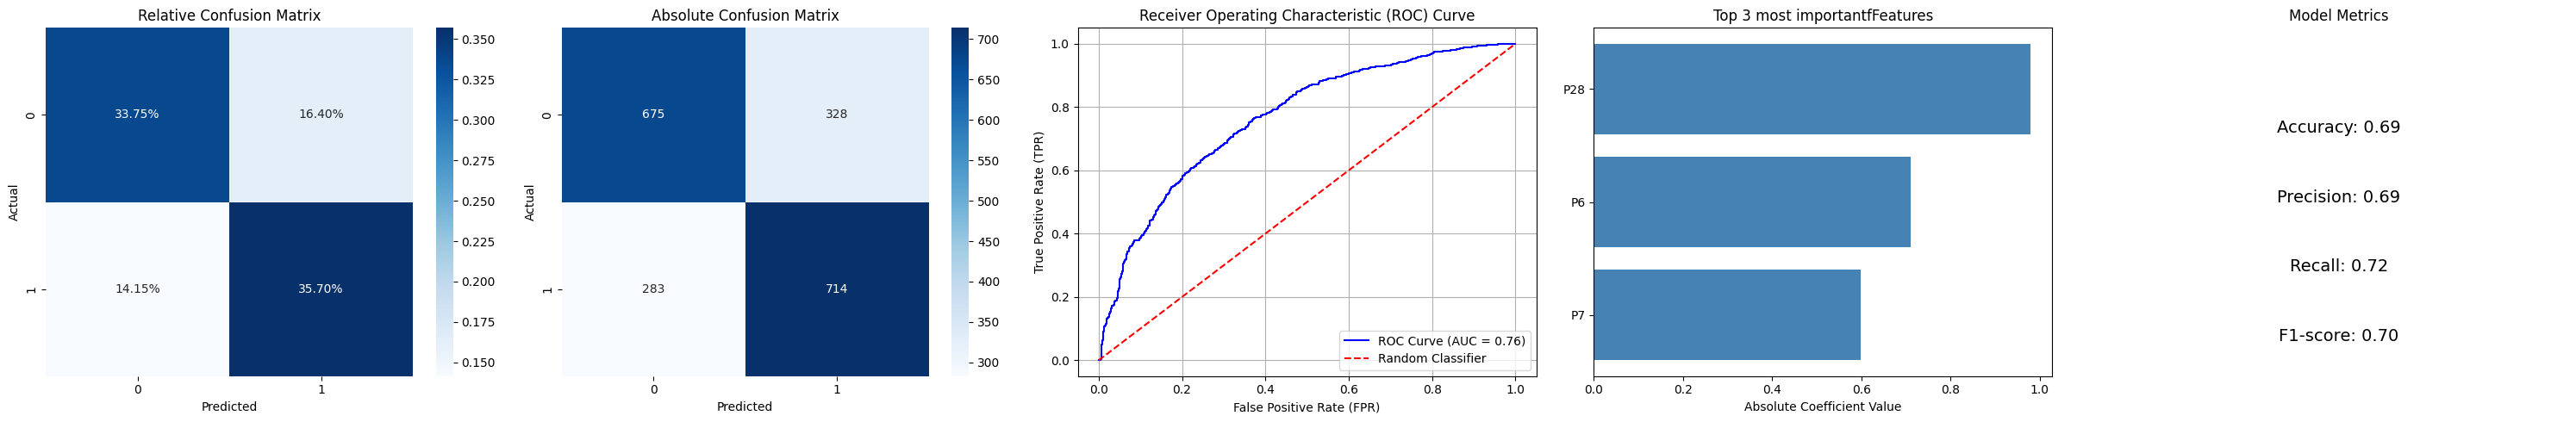

In [49]:
all_visuals(best_model, X_train, X_test, y_test, y_pred, probs)

In [50]:
X_to_predict = validate_df.drop(columns = ['ID', 'Target'])

In [51]:
y_predicted = best_model.predict(X_to_predict)

In [52]:
validate_df['label'] = y_predicted

In [53]:
validate_df[['ID', 'label']].to_csv("/content/predictions.csv")

# Task 3

## General

In [54]:
charges_df = pd.read_csv("/content/Charges.csv")
suspended_df = pd.read_csv("/content/Suspended.csv")
changes_df = pd.read_csv("/content/Tariff_plans_change.csv")

In [55]:
print(charges_df.shape)
print(suspended_df.shape)
print(changes_df.shape)

(112595, 3)
(4063, 4)
(12344, 4)


In [56]:
charges_df.head()

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
1,1754,2017-05-01,4.894
2,381,2017-01-01,6.670
3,5832,2016-12-01,4.299
4,5277,2017-03-01,1.610


In [57]:
suspended_df.head()

,SUBSCRIBER_ID,START_DT,END_DT,STATUS
0,5195,2017-12-27,2017-12-27,Suspended
1,5198,2017-04-18,2017-04-18,Suspended
2,381,2017-04-18,2017-04-20,Suspended
3,3500,2017-12-21,$null$,Suspended
4,3302,2016-08-23,2016-09-07,Suspended


In [58]:
changes_df.head()

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17
1,1,3,2017-03-11 14:24:18,$null$
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58
3,2,5,2017-06-29 12:39:59,$null$
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59


## 1.

In [59]:
changes_df['SUBSCRIBER_ID'].nunique()

5989

In [60]:
changes_df.dtypes

,0
SUBSCRIBER_ID,int64
TARIFF_PLAN_ID,int64
START_DTTM,object
END_DTTM,object


In [61]:
print(changes_df['END_DTTM'].max())
print(changes_df[changes_df['END_DTTM'] != '$null$']['END_DTTM'].min())

print(changes_df['START_DTTM'].max())
print(changes_df['START_DTTM'].min())

2018-01-19 17:51:56
2017-01-01 02:12:51
2017-06-30 23:51:34
1999-07-12 12:55:54


In [64]:
# The format of '$null$' wasn't really convenient for the analysis - so I turned it to the most recent date.

changes_df['END_DTTM'].replace(to_replace='$null$', value='2018-01-19', inplace=True)

<ipython-input-64-d1e7a3e79b14>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  changes_df['END_DTTM'].replace(to_replace='$null$', value='2018-01-19', inplace=True)


In [69]:
# Taking only dates and dropping time. Converting to datetime format.

changes_df['START_DTTM'] = pd.to_datetime(changes_df['START_DTTM'].astype(str).str[:10])
changes_df['END_DTTM'] = pd.to_datetime(changes_df['END_DTTM'].astype(str).str[:10])

In [70]:
count_of_rows_per_user = changes_df.groupby('SUBSCRIBER_ID').agg(count=('SUBSCRIBER_ID', 'count'))

In [71]:
# A rough estimate of the changes per user.
count_of_rows_per_user['count'].value_counts()

,count
count,
2,5718
3,233
4,20
6,12
5,3
8,1
16,1
18,1


In [72]:
changes_df

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
0,1,2,2013-11-22,2017-03-11
1,1,3,2017-03-11,2018-01-19
2,2,1,2016-02-05,2017-06-29
3,2,5,2017-06-29,2018-01-19
4,3,1,2015-05-06,2017-04-14
...,...,...,...,...
12339,5987,3,2017-05-23,2018-01-19
12340,5988,1,2017-05-10,2017-05-22
12341,5988,4,2017-05-22,2018-01-19
12342,5989,5,2017-05-24,2017-05-25


In [74]:
changes_df['TARIFF_PLAN_ID'].value_counts()

,count
TARIFF_PLAN_ID,
5,5050
3,2972
1,2189
4,1488
2,645


In [75]:
changes_df['YEAR'] = changes_df['START_DTTM'].dt.year
changes_df['MONTH'] = changes_df['START_DTTM'].dt.month
changes_df['DAYOFTHEMONTH'] = changes_df['START_DTTM'].dt.day

In [76]:
changes_df

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,YEAR,MONTH,DAYOFTHEMONTH
0,1,2,2013-11-22,2017-03-11,2013,11,22
1,1,3,2017-03-11,2018-01-19,2017,3,11
2,2,1,2016-02-05,2017-06-29,2016,2,5
3,2,5,2017-06-29,2018-01-19,2017,6,29
4,3,1,2015-05-06,2017-04-14,2015,5,6
...,...,...,...,...,...,...,...
12339,5987,3,2017-05-23,2018-01-19,2017,5,23
12340,5988,1,2017-05-10,2017-05-22,2017,5,10
12341,5988,4,2017-05-22,2018-01-19,2017,5,22
12342,5989,5,2017-05-24,2017-05-25,2017,5,24


In [81]:
occurencies_per_year = changes_df.groupby('YEAR').agg(count=('SUBSCRIBER_ID', 'count'))

In [82]:
occurencies_per_year

,count
YEAR,
1999,5
2000,10
2001,37
2002,132
2003,110
2004,192
2005,223
2006,203
2007,201


In [230]:
yearly_counts_1 = []
yearly_counts_2 = []
yearly_counts_3 = []
yearly_counts_4 = []
yearly_counts_5 = []

for year in range(1999, 2018):
 yearly_counts_1.append(changes_df[(changes_df['YEAR'] == year) & (changes_df['TARIFF_PLAN_ID'] == 1)].shape[0])
 yearly_counts_2.append(changes_df[(changes_df['YEAR'] == year) & (changes_df['TARIFF_PLAN_ID'] == 2)].shape[0])
 yearly_counts_3.append(changes_df[(changes_df['YEAR'] == year) & (changes_df['TARIFF_PLAN_ID'] == 3)].shape[0])
 yearly_counts_4.append(changes_df[(changes_df['YEAR'] == year) & (changes_df['TARIFF_PLAN_ID'] == 4)].shape[0])
 yearly_counts_5.append(changes_df[(changes_df['YEAR'] == year) & (changes_df['TARIFF_PLAN_ID'] == 5)].shape[0])


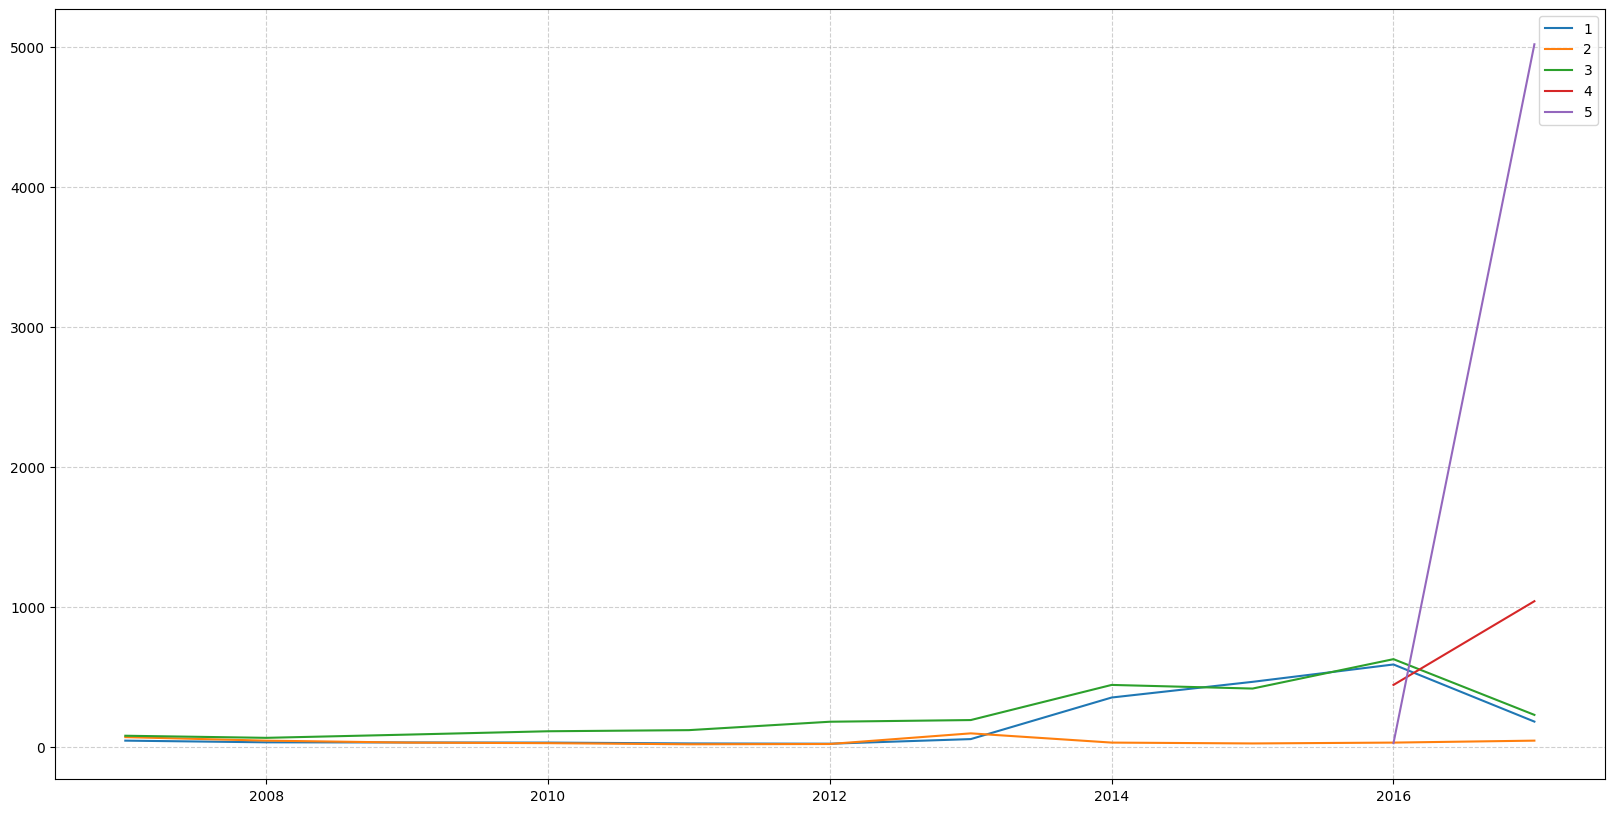

In [231]:
plt.figure(figsize=(20,10))
plt.plot(range(2007, 2018), yearly_counts_1[8:19], label='1')
plt.plot(range(2007, 2018), yearly_counts_2[8:19], label='2')
plt.plot(range(2007, 2018), yearly_counts_3[8:19], label='3')
plt.plot(range(2016, 2018), yearly_counts_4[17:19], label='4')
plt.plot(range(2016, 2018), yearly_counts_5[17:19], label='5')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()


As we can see, the major directions are:


*   1 to 4
*   1 to 5
*   3 to 4
*   3 to 5

## 2.

In [86]:
users_ids = list(set(changes_df['SUBSCRIBER_ID']))

In [151]:
def get_last(changes_df, user):
  ch = changes_df.sort_values(by='END_DTTM', ascending=False)
  a = changes_df[changes_df['SUBSCRIBER_ID'] == user].head(1)
  return a

In [152]:
dfs = [get_last(changes_df, user) for user in users_ids]
combined_df = pd.concat(dfs, axis=0)

In [93]:
# The last change of tariff plan for each person
combined_df

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,YEAR,MONTH,DAYOFTHEMONTH
0,1,2,2013-11-22,2017-03-11,2013,11,22
2,2,1,2016-02-05,2017-06-29,2016,2,5
4,3,1,2015-05-06,2017-04-14,2015,5,6
6,4,3,2016-01-27,2017-01-09,2016,1,27
8,5,1,2016-02-06,2017-05-08,2016,2,6
...,...,...,...,...,...,...,...
12334,5985,4,2017-04-14,2017-06-17,2017,4,14
12336,5986,5,2017-05-01,2017-06-27,2017,5,1
12338,5987,5,2017-05-08,2017-05-23,2017,5,8
12340,5988,1,2017-05-10,2017-05-22,2017,5,10


In [94]:
combined_df['DIVIDER_DATE'] = combined_df['END_DTTM']
combined_df['DIVIDER_DATE'] = combined_df['DIVIDER_DATE'].dt.to_period('M')

In [95]:
combined_df = combined_df[['SUBSCRIBER_ID', 'TARIFF_PLAN_ID', 'DIVIDER_DATE']]

In [96]:
combined_df.nunique()

,0
SUBSCRIBER_ID,5989
TARIFF_PLAN_ID,5
DIVIDER_DATE,6


In [97]:
charges_df.head()

,SUBSCRIBER_ID,BILL_MONTH,CHARGES
0,4741,2017-03-01,4.572
1,1754,2017-05-01,4.894
2,381,2017-01-01,6.670
3,5832,2016-12-01,4.299
4,5277,2017-03-01,1.610


In [98]:
charges_df['BILL_MONTH'] = pd.to_datetime(charges_df['BILL_MONTH'])
charges_df['PERIOD'] = charges_df['BILL_MONTH'].dt.to_period('M')

In [99]:
def mean_3_months(reference_date, id, before=True):
    """
    If before=True, the functions calculates the average before transition.
    If before=False, the functions calculates the average after transition.
    """
    reference_date = pd.to_datetime(reference_date)

    if before == True:
        month_1 = reference_date - pd.DateOffset(months=1)
        month_2 = reference_date - pd.DateOffset(months=2)
        month_3 = reference_date - pd.DateOffset(months=3)

    else:
        month_1 = reference_date
        month_2 = reference_date + pd.DateOffset(months=1)
        month_3 = reference_date + pd.DateOffset(months=2)

    reference_date = reference_date.to_period('M')
    month_1 = month_1.to_period('M')
    month_2 = month_2.to_period('M')
    month_3 = month_3.to_period('M')

    charge_1_df = charges_df[(charges_df['PERIOD'] == month_1) & (charges_df['SUBSCRIBER_ID'] == id)]['CHARGES']
    charge_2_df = charges_df[(charges_df['PERIOD'] == month_2) & (charges_df['SUBSCRIBER_ID'] == id)]['CHARGES']
    charge_3_df = charges_df[(charges_df['PERIOD'] == month_3) & (charges_df['SUBSCRIBER_ID'] == id)]['CHARGES']

    charge_1 = charge_1_df.iloc[0] if not charge_1_df.empty else np.nan
    charge_2 = charge_2_df.iloc[0] if not charge_2_df.empty else np.nan
    charge_3 = charge_3_df.iloc[0] if not charge_3_df.empty else np.nan

    return np.nanmean([charge_1, charge_2, charge_3])

In [100]:
means_before = []
means_after = []

divider_dates = list(combined_df['DIVIDER_DATE'].astype(str).reset_index(drop=True))
ids = combined_df['SUBSCRIBER_ID']
ids = list(ids.reset_index(drop=True))

for id in range(0, len(divider_dates)):
    means_before.append(mean_3_months(divider_dates[id], ids[id], before=True))
    means_after.append(mean_3_months(divider_dates[id], ids[id], before=False))

<ipython-input-99-f92daf9fcbe0>:36: RuntimeWarning: Mean of empty slice
  return np.nanmean([charge_1, charge_2, charge_3]) # Using nanmean to handle NaNs


Do the lengths align?

In [101]:
print(len(means_before))
print(len(means_after))

5989
5989


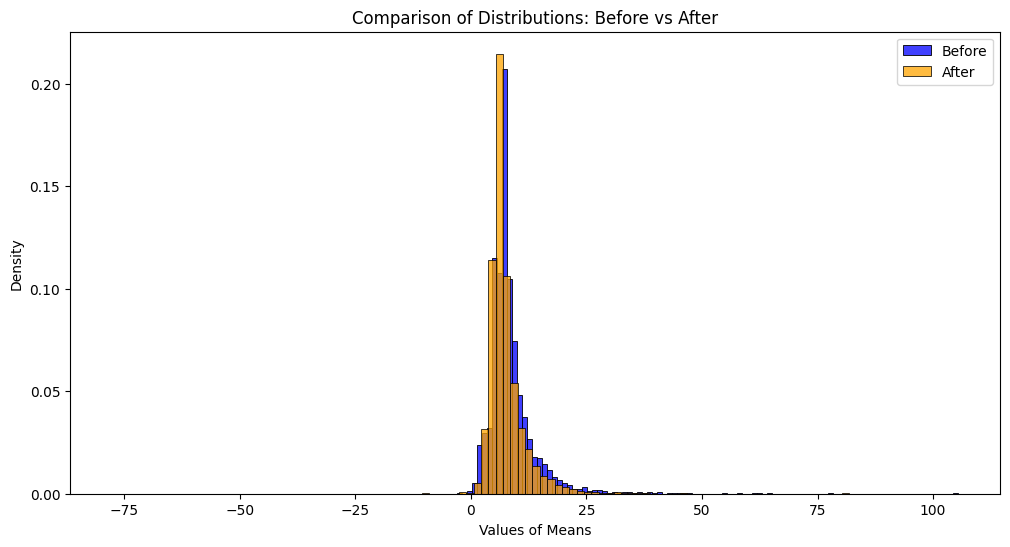

In [102]:
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.histplot(means_before, color='blue', label='Before', bins=100, kde=False, stat='density')  # Adjust bins, add KDE
sns.histplot(means_after, color='orange', label='After', bins=100, kde=False, stat='density')  # Adjust bins, add KDE
plt.title("Comparison of Distributions: Before vs After")
plt.xlabel("Values of Means")
plt.ylabel("Density")
plt.legend()
plt.show()


Observations: the mean of charges became slightly smaller after the transition.

## 3.

In [115]:
suspended_df

,SUBSCRIBER_ID,START_DT,END_DT,STATUS,DIVIDER_DATE
0,5195,2017-12-27,2017-12-27,Suspended,2017-12
1,5198,2017-04-18,2017-04-18,Suspended,2017-04
2,381,2017-04-18,2017-04-20,Suspended,2017-04
3,3500,2017-12-21,$null$,Suspended,2017-12
4,3302,2016-08-23,2016-09-07,Suspended,2016-08
...,...,...,...,...,...
4058,2166,2016-07-23,2016-07-24,Suspended,2016-07
4059,2166,2016-07-02,2016-07-05,Suspended,2016-07
4060,2166,2016-06-18,2016-06-21,Suspended,2016-06
4061,2166,2016-06-11,2016-06-11,Suspended,2016-06


In [108]:
suspended_df['START_DT'] = pd.to_datetime(suspended_df['START_DT'])
suspended_df['DIVIDER_DATE'] = suspended_df['START_DT'].dt.to_period('M')

In [104]:
suspended_df['STATUS'].value_counts()

,count
STATUS,
Suspended,4063


In [144]:
def suspended_3_months(reference_date, id, before=True):
    """
    If before=True, the functions calculates the count of times a use was suspended before transition.
    If before=False, the functions calculates the count of times a use was suspended after transition.
    """
    reference_date = pd.to_datetime(reference_date)

    if before == True:

        date = reference_date - pd.DateOffset(months=3)

        suspends_count = suspended_df[(suspended_df['START_DT'] > date) & (suspended_df['START_DT'] < reference_date) & (suspended_df['SUBSCRIBER_ID'] == id)].shape[0]

    else:

        date = reference_date + pd.DateOffset(months=3)

        suspends_count = suspended_df[(suspended_df['START_DT'] < date) & (suspended_df['START_DT'] > reference_date) & (suspended_df['SUBSCRIBER_ID'] == id)].shape[0]


    return suspends_count


In [153]:
combined_df

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM,YEAR,MONTH,DAYOFTHEMONTH
0,1,2,2013-11-22,2017-03-11,2013,11,22
2,2,1,2016-02-05,2017-06-29,2016,2,5
4,3,1,2015-05-06,2017-04-14,2015,5,6
6,4,3,2016-01-27,2017-01-09,2016,1,27
8,5,1,2016-02-06,2017-05-08,2016,2,6
...,...,...,...,...,...,...,...
12334,5985,4,2017-04-14,2017-06-17,2017,4,14
12336,5986,5,2017-05-01,2017-06-27,2017,5,1
12338,5987,5,2017-05-08,2017-05-23,2017,5,8
12340,5988,1,2017-05-10,2017-05-22,2017,5,10


In [171]:
divider_dates = list(combined_df['START_DTTM'].astype(str))
suspends_before = []
suspends_after = []

for id in range(0, len(divider_dates)):

  suspends_before.append(suspended_3_months(divider_dates[id], ids[id], before=True))
  suspends_after.append(suspended_3_months(divider_dates[id], ids[id], before=False))


In [174]:
# Check for compliance
print(len(suspends_before))
print(len(suspends_after))

5989
5989


In [184]:
pd.Series(suspends_before).value_counts()

,count
0,5926
1,48
2,7
3,4
4,2
10,1
5,1


In [200]:
pd.Series(suspends_after).value_counts()


,count
0,5804
1,112
2,45
3,19
4,4
5,2
9,1
7,1
6,1


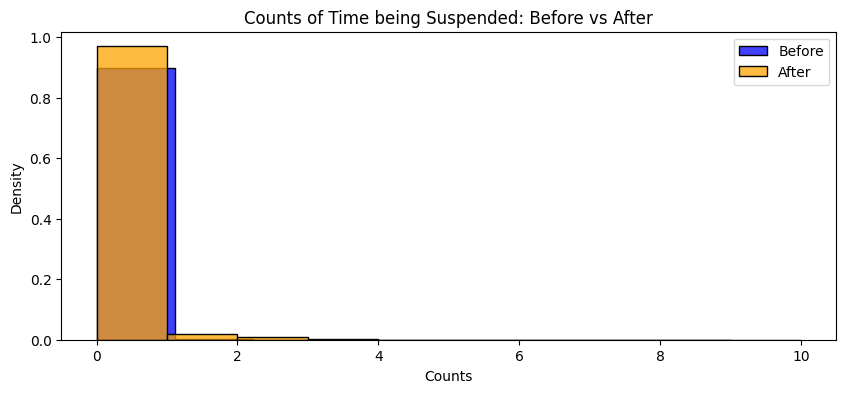

In [210]:
plt.figure(figsize=(10, 4))
sns.histplot(suspends_before, color='blue', label='Before', bins=9, kde=False, stat='density')
sns.histplot(suspends_after, color='orange', label='After', bins=9, kde=False, stat='density')
plt.title("Counts of Time being Suspended: Before vs After")
plt.xlabel("Counts")
plt.ylabel("Density")
plt.legend()
plt.show()